In [17]:
import os
import json
import time
from itertools import product

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tabulate import tabulate

import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler



In [18]:
# Importamos datos depurados
df = pd.read_csv('../../Data/dropout_depurado.csv', sep=',')

# Separamos features de target
y = df['Dropout']
X = df.drop('Dropout', axis=1)

# Separamos train de test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)


Vamos a crear un excel de resultados en el que almacenemos los resultados de cada modelo entrenado: la clase, la parametrizacion, la matriz de confusion en 4 columnas (TP, FP, FN, TN), y las variables input del modelo (si en el futuro el pretratamiento cambia, seremos capaces de rastrearlo y comparar distintos pretratamientos)

Modelo: DecisionTreeClassifier (Validación Cruzada)


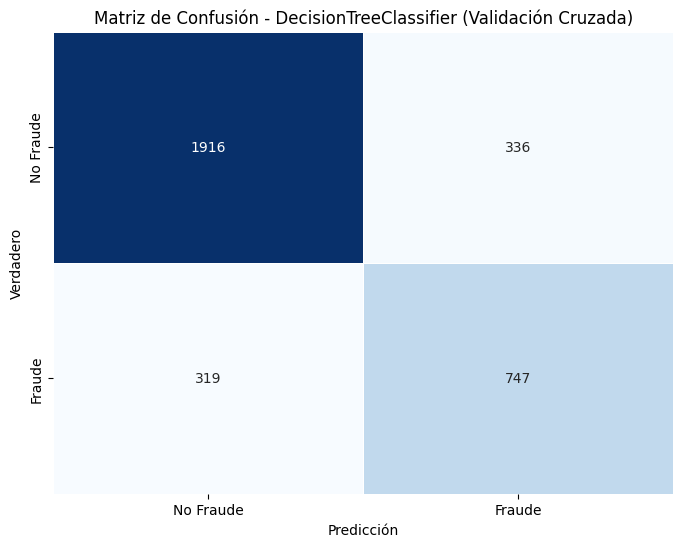

Modelo: LogisticRegression (Validación Cruzada)


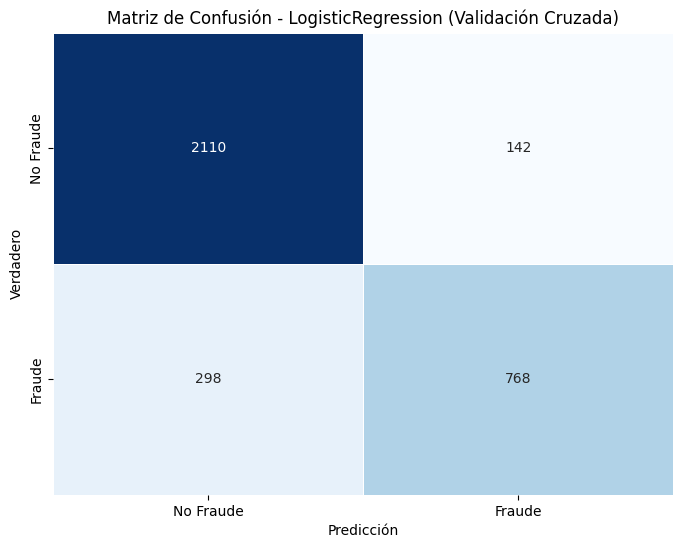

Modelo: RandomForestClassifier (Validación Cruzada)


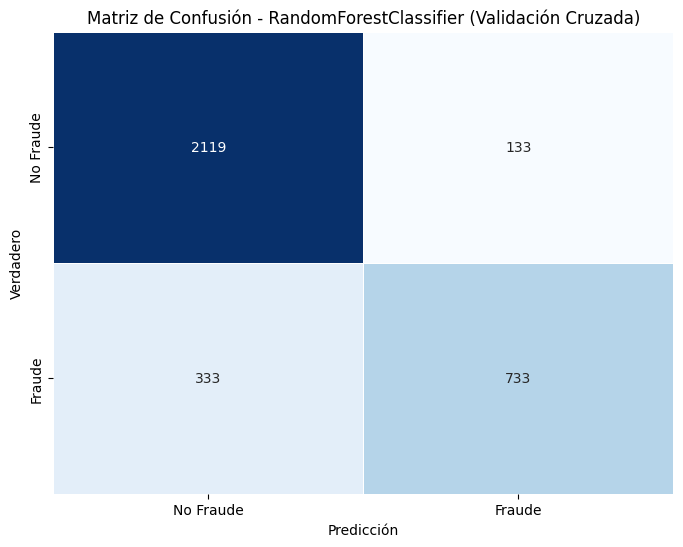

Modelo: SVC (Validación Cruzada)


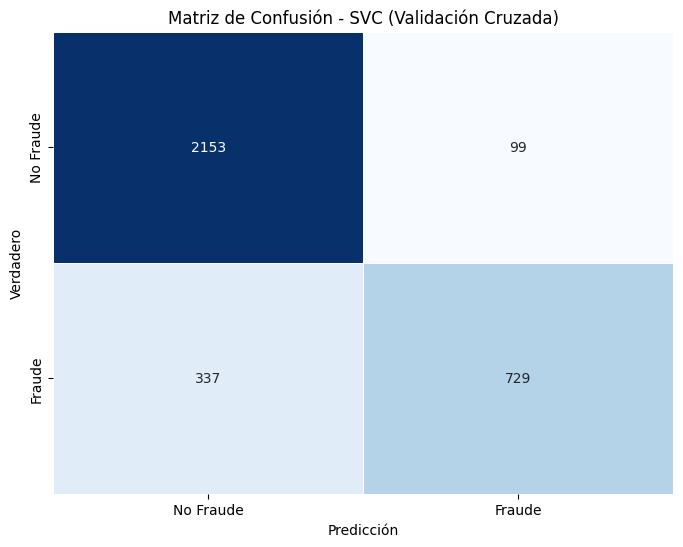

Modelo: XGBClassifier (Validación Cruzada)


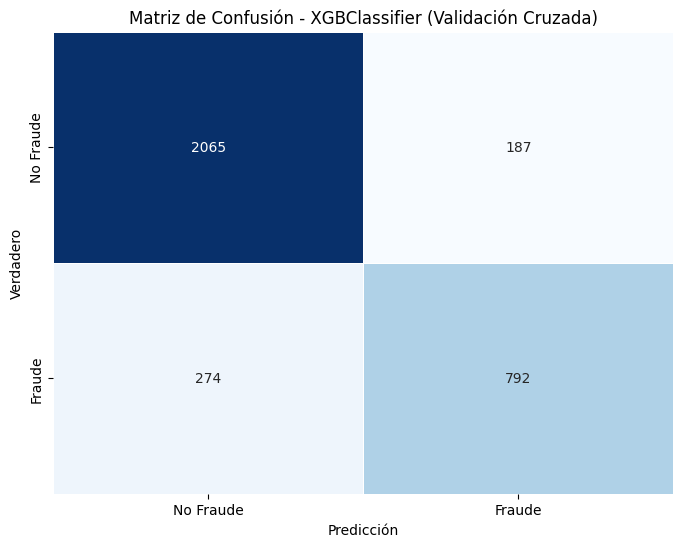

Modelo: KNeighborsClassifier (Validación Cruzada)


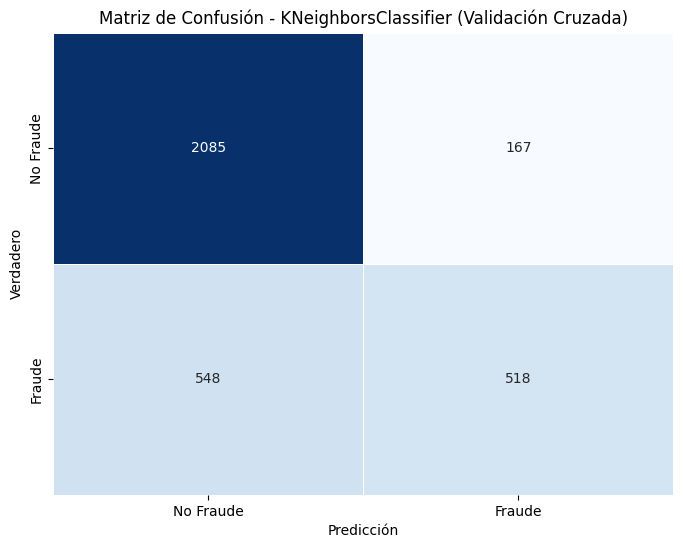

Modelo: GaussianNB (Validación Cruzada)


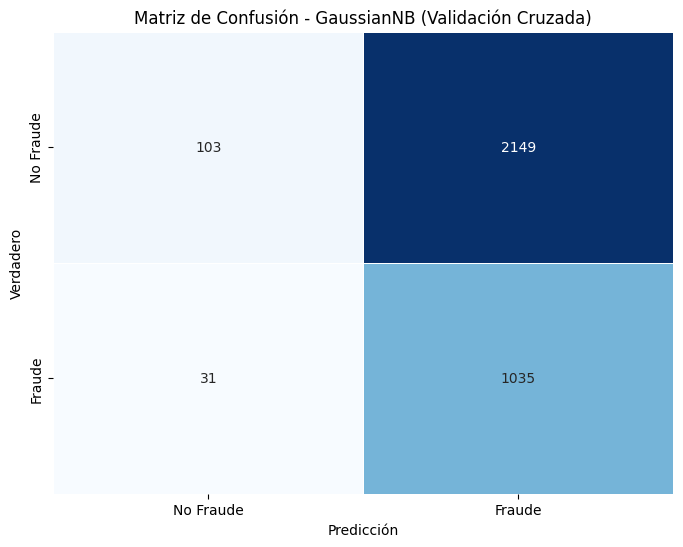

Modelo: AdaBoostClassifier (Validación Cruzada)


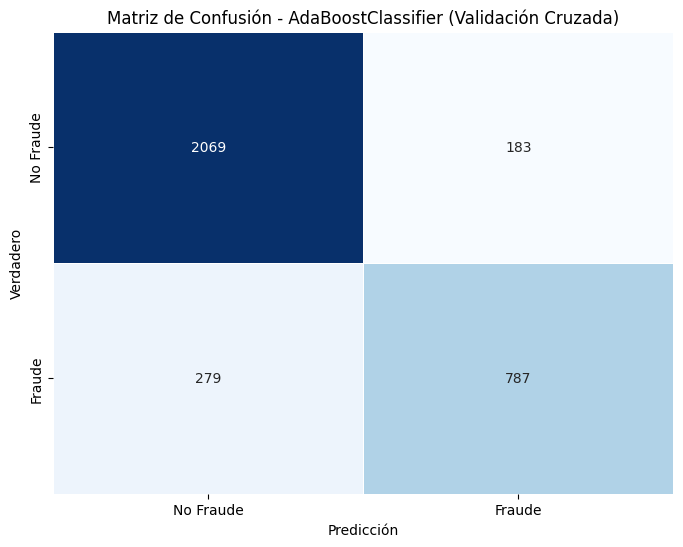

Modelo: GradientBoostingClassifier (Validación Cruzada)


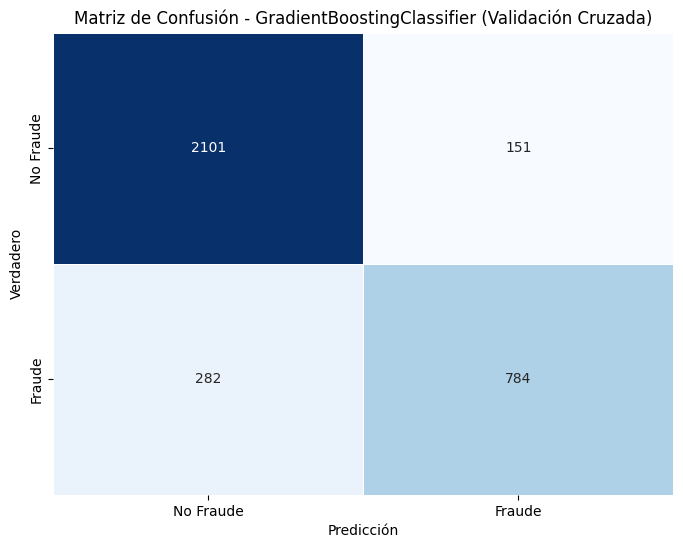

c:\Users\mjdiaz\.conda\envs\entorno_tfm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mjdiaz\.conda\envs\entorno_tfm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mjdiaz\.conda\envs\entorno_tfm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mjdiaz\.conda\envs\entorno_tfm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mjd

Modelo: MLPClassifier (Validación Cruzada)


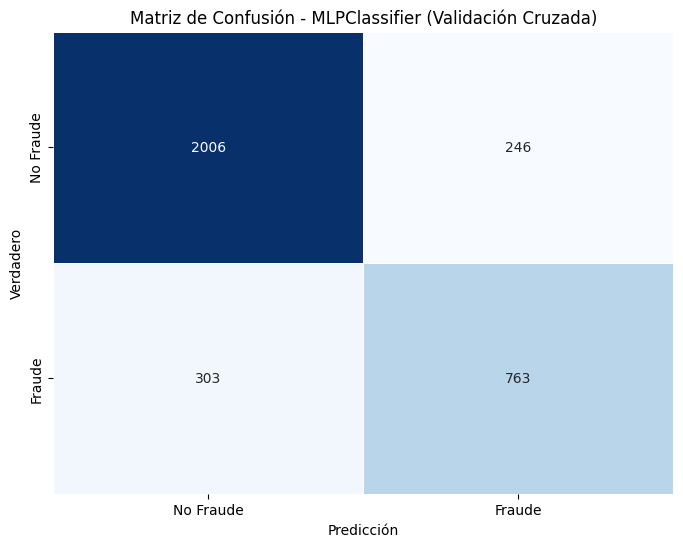

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# Crear un validador cruzado estratificado para conservar la proporción de clases en cada pliegue
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Importamos el excel creado para guardar los resultados
operacion_resultados = pd.read_excel('tabla_resultados.xlsx')

# Definimos la lista de modelos a probar
models = [
    DecisionTreeClassifier(),
    LogisticRegression(max_iter=999999),
    RandomForestClassifier(),
    SVC(),
    XGBClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),  # Naive Bayes Classifier
    AdaBoostClassifier(),  # AdaBoost Classifier
    GradientBoostingClassifier(),  # Gradient Boosting Classifier
    MLPClassifier()  # Multi-layer Perceptron Classifier
]

# Función para mostrar métricas y matriz de confusión
def print_evaluation_metrics(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"Modelo: {model_name}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                annot_kws={"size": 10}, linewidths=0.5, 
                xticklabels=['No Fraude', 'Fraude'], 
                yticklabels=['No Fraude', 'Fraude'])
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()
    
    return cm

# Entrenar y evaluar cada modelo con validación cruzada
for model in models:
    model_name = model.__class__.__name__
    
    # Crear el pipeline con MinMaxScaler y el modelo actual
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Escalador MinMaxScaler
        ('model', model)  # Modelo a entrenar
    ])
    
    # Obtener predicciones de validación cruzada usando el pipeline
    y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=cv)
    
    # Obtener las métricas
    cm = print_evaluation_metrics(f'{model_name} (Validación Cruzada)', y_train, y_pred_cv)
    
    # Capturando detalles del modelo
    params = model.get_params() if hasattr(model, 'get_params') else 'default'
    params_json = json.dumps(params)
    input_variables = list(X_train.columns)
    execution_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Extraer TP, FP, FN, TN de la matriz de confusión
    tn, fp, fn, tp = cm.ravel()
    
    # Crear un nuevo DataFrame con los resultados
    new_row = pd.DataFrame({
        'Modelo': [model_name],
        'Comentarios': "Primera tirada de modelos con validación cruzada y MinMaxScaler",
        'TP': [tp],
        'FP': [fp],
        'FN': [fn],
        'TN': [tn],
        'Parametrizacion': [params_json],
        'Variables input del modelo': [input_variables],
        'Fecha de ejecucion del modelo': [execution_date]
    })
    
    # Concatenar el nuevo DataFrame con el DataFrame existente
    operacion_resultados = pd.concat([operacion_resultados, new_row], ignore_index=True)

    # Guardar el DataFrame de resultados actualizados
    operacion_resultados.to_excel('tabla_resultados.xlsx', index=False)


Ejemplo busqueda parametrica para la arquitectura xgboost me come los huevs

In [ ]:
model = XGBClassifier()

# Define the expanded parameter grid for XGBClassifier
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01],
    'max_depth': [None, 3],
    'min_child_weight': [1, 3],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5],
    'scale_pos_weight': [1, 2, 5],
    'objective': ['binary:logistic', 'binary:hinge', 'binary:logitraw'],
    'booster': ['gbtree', 'dart'],
    'max_delta_step': [0, 1, 5],
    'eval_metric': ['logloss', 'auc']
}

# Generate all combinations of parameters
param_combinations = list(product(*param_grid.values()))

# Ruta del archivo
file_path = 'tabla_resultados.xlsx'

# Comprobar si el archivo existe
if os.path.exists(file_path):
    # Leer el archivo
    operacion_resultados = pd.read_excel(file_path)
else:
    # Inicializar el DataFrame vacío
    operacion_resultados = pd.DataFrame(columns=['Modelo', 'Parametrizacion', 'TP', 'FP', 'FN', 'TN', 'Variables input del modelo', 'Fecha de ejecucion del modelo', 'Comentarios'])


In [ ]:
from datetime import datetime
import time
import cupy as cp

# Iniciar el tiempo al inicio del bucle
start_time = time.time()

# Pedir al usuario que especifique desde qué valor de i comenzar
# start_i = int(input("Ingrese el valor inicial de i: ")) # Esto es en caso de que se desee detener el entrenamiento y reiniciar desde el mismo punto
start_i = 0

# Iterar sobre todas las combinaciones de parámetros
for i, combination in enumerate(param_combinations[start_i:], start=start_i):
    # Crear un diccionario de parámetros para el modelo
    params = {key: combination[j] for j, key in enumerate(param_grid.keys())}

    print(f'Probando con parametrizacion {i+1}/{len(param_combinations)} con parametros: {params}.')

    # Crear y entrenar el modelo con esta configuración
    model = XGBClassifier(
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        min_child_weight=params['min_child_weight'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        gamma=params['gamma'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        scale_pos_weight=params['scale_pos_weight'],
        objective=params['objective'],
        booster=params['booster'],
        max_delta_step=params['max_delta_step'],
        tree_method='hist',
        device='cuda',
        use_label_encoder=False,
        eval_metric=params['eval_metric'], 
        predictor='gpu_predictor'
    )

    model.fit(np.array(X_train), np.array(y_train))

    # Predecir los valores de test
    y_pred = model.predict(np.array(X_test))

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print('\n' + '-'*40 + '\n')

    # Añadir los valores de la nueva parametrización a la lista de resultados
    new_row = {
        'Modelo': 'XGBClassifier',
        'Parametrizacion': params,
        'TP': conf_matrix[1][1],
        'FP': conf_matrix[0][1],
        'FN': conf_matrix[1][0],
        'TN': conf_matrix[0][0],
        'Variables input del modelo': list(X_train.columns),
        'Fecha de ejecucion del modelo': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'Comentarios': 'Entrenamiento real XGBoost'
    }

    # Concatenar el nuevo DataFrame con el DataFrame existente
    operacion_resultados = pd.concat([operacion_resultados, pd.DataFrame([new_row])], ignore_index=True)

    # Guardar en el archivo Excel cada 100 iteraciones
    if (i + 1) % 10 == 0:
        operacion_resultados.to_excel(file_path, index=False)
        print(f"Guardado automático en el archivo Excel después de {i + 1} iteraciones.")

# Guardar el DataFrame actualizado en el archivo Excel al finalizar todas las iteraciones
operacion_resultados.to_excel(file_path, index=False)

end_time = time.time()
print(f"Grid search completed in {end_time - start_time} seconds.")
